<a href="https://colab.research.google.com/github/gziz/mars-routes/blob/main/mars_descend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descenso al fondo de un cráter en Marte

# Libraries

In [1]:
!pip install simpleai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 2.7 MB/s 
  Created wheel for simpleai: filename=simpleai-0.8.3-py3-none-any.whl size=101000 sha256=84872957602cc92bed7f69719e77bb5b47ad2babeff60ff9751329594b437a57
  Stored in directory: /root/.cache/pip/wheels/9a/d1/3b/ef0fc9aee7197e62482fc629181119aaacb684225057516de3
Successfully built simpleai


In [2]:
import numpy as np
import pandas as pd
import math
import time
import random
import matplotlib.pyplot as plt
from simpleai.search import SearchProblem
from simpleai.search.local import hill_climbing, simulated_annealing, beam
import seaborn as sns
import plotly.graph_objects as go

# Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
mars_map = np.load('/DATA/mars_crater.npy')
n_rows, n_cols = mars_map.shape

print('Img size: ', n_rows, n_cols)

Img size:  1077 717


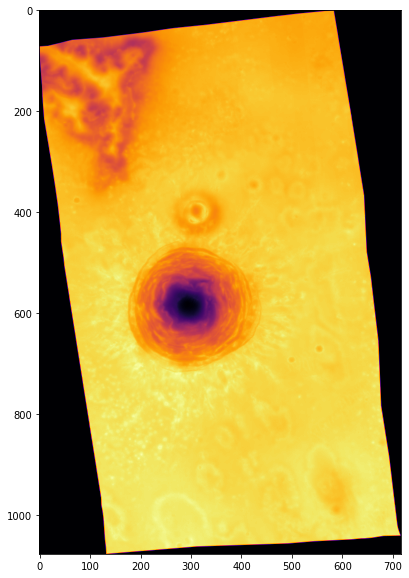

In [5]:
fig = plt.figure(figsize=(10,10))
plt.imshow(mars_map, cmap='inferno')
plt.show()

In [8]:
# Transform from xy to img coordinates
def xy_to_img(obj_x_y):
    x = obj_x_y[0]
    y = obj_x_y[1]
    return  (n_rows-round(y/10.045), round(x/10.045))

In [9]:
# Initial position
p0 = (3350,5800)
p0 = xy_to_img(p0)
print(p0)

(500, 333)


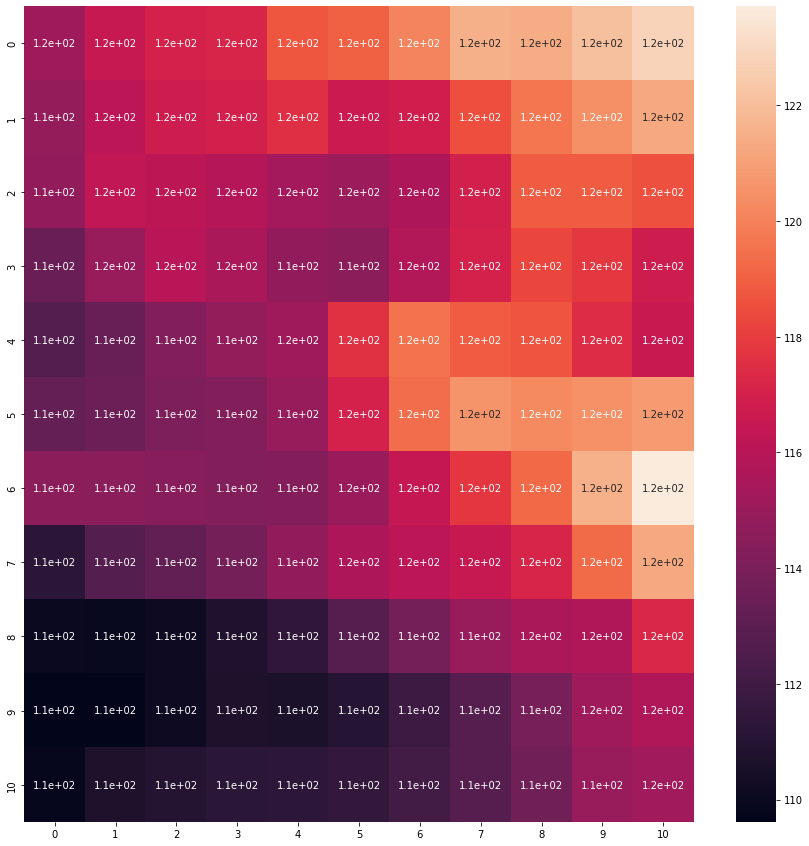

In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(mars_map[495:506, 328:339], annot = True)

In [11]:
# Destination points
relevant_points = [[333, 577, 117.025], [329, 573,109.62 ], [0,0,0]]
df = pd.DataFrame(relevant_points, columns = [['x','y', 'z']])
df

,x,y,z
0,333,577,117.025
1,329,573,109.620
2,0,0,0.000


In [12]:
x = list(range(718))
y = list(reversed(range(1078)))

In [16]:
class MarsRoverProblemDescenso(SearchProblem):

    def __init__(self, max_dif_h, **kwds):
       super(MarsRoverProblemDescenso, self).__init__(**kwds)
       self.max_dif_h = max_dif_h

    def actions(self, state):
        x = state[0]
        y = state[1]
        h0 = mars_map[x,y]
        list_actions = []

        movements = [[-1, 1], [0, 1], [1,1],
                     [-1, 0], [1, 0],
                     [-1,-1], [0,-1], [1,-1]]                                

        for movement in movements:
            
            new_x, new_y = x + movement[0], y + movement[1]           
            h = mars_map[new_x, new_y]

            if abs(h-h0) < self.max_dif_h and h!=-1.0:
                list_actions.append([new_x,new_y])

        return list_actions
        

    def result(self, state, action):
        return  tuple([action[0], action[1]])


    def value(self, state):

        return - mars_map[state[0], state[1]]

    def generate_random_state(self):
        x = np.random.randint(200, 1000)
        y = np.random.randint(200, 600)
        return (x, y)

# Greedy Algorithm

### Run algorithm with the given initial state

Empleando el algoritmo voraz, el agente parece disminuir una decena de metros antes de parar y regresar resultados. Especificamente, 18 metros.

In [17]:
# Punto dado por la tarea
p0 = (3350,5800)
INIT_STATE = xy_to_img(p0)
print("Estado inicial: ", INIT_STATE)

mars_problem = MarsRoverProblemDescenso(max_dif_h = 2, initial_state = INIT_STATE)
result = hill_climbing(mars_problem)
print("Estado final: ", result.state)

print("Altura estado inicial: ", mars_map[INIT_STATE])
print("Altura estado final: ", mars_map[result.state])

Estado inicial:  (500, 333)
Estado final:  (504, 329)
Altura estado inicial:  117.02547363281272
Altura estado final:  109.61716064453147


### Correr el algoritmo con 5 puntos al azar

In [18]:
# Función para correr N puntos al azar
def run_random_points(n = 5):
    for i in range(1, n+1):
        print(f'Run with pair {i}')
        p0_x = np.random.randint(200, 1000)
        p0_y = np.random.randint(200, 600)
        INIT_STATE = (p0_x, p0_y)
        print("Initial state: ", INIT_STATE)

        mars_problem = MarsRoverProblemDescenso(max_dif_h = 2, initial_state = INIT_STATE)
        result = hill_climbing(mars_problem)
        print("Final state: ", result.state)

        print("Initial Height: ", mars_map[INIT_STATE])
        print("Final Height: ", mars_map[result.state])
        print()

In [19]:
# Correr el algoritmo hill climbing con 5 puntos al azar
run_random_points(5)

Run with pair 1
Initial state:  (675, 455)
Final state:  (676, 454)
Initial Height:  152.38738769531273
Final Height:  152.13601074218772

Run with pair 2
Initial state:  (498, 425)
Final state:  (500, 423)
Initial Height:  148.18173583984398
Final Height:  147.34192382812523

Run with pair 3
Initial state:  (577, 209)
Final state:  (581, 217)
Initial Height:  112.61732910156272
Final Height:  105.73399658203147

Run with pair 4
Initial state:  (640, 247)
Final state:  (641, 242)
Initial Height:  107.96467529296896
Final Height:  101.65529785156272

Run with pair 5
Initial state:  (723, 529)
Final state:  (725, 528)
Initial Height:  152.00777587890647
Final Height:  151.19292236328147



## Resultados

* ¿Hasta donde es capaz el explorador de llegar? 
    * El explorador utilizando el algoritmo de hill climbing, es capaz de disminuir hasta la altura de 109.61.

* Prueben su algoritmo con otras cinco posiciones cercanas y lejanas al fondo del cráter. 
* ¿Qué tan bueno es el algoritmo para llegar al fondo del cráter es los casos probados?
    * La eficacia del algoritmo a acercarse al crater, depende en gran parte de donde comienze, en algunas ocasiones, este comienza en una posición particularmente complicada y en otras el descenso es mas fluido.

# Simulated Annealing

In [20]:
p0 = (3350,5800)
INIT_STATE = xy_to_img(p0)

print("Initial State: ", INIT_STATE)

mars_problem = MarsRoverProblemDescenso(initial_state = INIT_STATE, max_dif_h = 0.5)

result = simulated_annealing(mars_problem, iterations_limit = 1000)
print("Final State: ", result.state)
print("Initial Height: ", mars_map[INIT_STATE])
print("Final Height: ", mars_map[result.state])

Initial State:  (500, 333)
Final State:  (500, 333)
Initial Height:  117.02547363281272
Final Height:  117.02547363281272


El algoritmo anterior funciona con una diferencia de altura máxima de 0.5 metros, es una de las razones por la cual no logra descendar de su punto de partida. Si hipoteticamente tuvieramos una max_dif_h diferente, por ejemplo, de 2 metros, el algoritmo de simulated annealing podría descender un poco de su punto inicial, aproximadamente hasta los 100 metros de altura.

In [21]:
p0 = (3350,5800)
INIT_STATE = xy_to_img(p0)


print("Initial State: ", INIT_STATE)

mars_problem = MarsRoverProblemDescenso(initial_state = INIT_STATE, max_dif_h = 2)

result = simulated_annealing(mars_problem, iterations_limit = 1000)
print("Final State: ", result.state)
print("Initial Height: ", mars_map[INIT_STATE])
print("Final Height: ", mars_map[result.state])

Initial State:  (500, 333)
Final State:  (495, 297)
Initial Height:  117.02547363281272
Final Height:  104.37145507812522


# Beam

* La naturaleza de Beam Search nos da la razón por la cual se puede obtener mejores resultados con este método. Pruba con multiples puntos al azar, en lugar de solo uno a la vez.
* Previamente se ha mencionado que la razón por la que se tiene problemas para descender es el punto de inicio, en este caso, esta no es una limitante.
* Se debío agregar un método adicional a la clase de Problema, el método generate_random_state

In [22]:
p0 = (3350,5800)
INIT_STATE = xy_to_img(p0)

print("Initial State: ", INIT_STATE)

mars_problem = MarsRoverProblemDescenso(initial_state = INIT_STATE, max_dif_h = 2)

result = beam(mars_problem, beam_size=100)
print("Final State: ", result.state)
print("Initial Height: ", mars_map[INIT_STATE])
print("Final Height: ", mars_map[result.state])

Initial State:  (500, 333)
Final State:  (580, 289)
Initial Height:  117.02547363281272
Final Height:  1.6841308593752182
